
## <font color='green'> hh's NASA Review: </font> 
#### Three files:
#### 1. Fire_V1
#### 2. Fire_M6
#### 3. FireJ1V-C2 - 
   ##### IIRS 375m NRT files:(VJ114IMGDL) VIIRS Active Fire and Thermal Anomalies product from NOAA-20 (JPSS-1) processed by LANCE / FIRMS


In [1]:
import os
import glob
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### Merge V1 NASA data into single file, current and archive.

os.chdir('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_Fire_V1_110068')

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

###combine all files in the list
NASAV1combined = pd.concat([pd.read_csv(f) for f in all_filenames ])
###export to csv
NASAV1combined.to_csv( "NASAV1combined.csv", index=False, encoding='utf-8-sig')

In [ ]:
FRPdf = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_Fire_V1_110068/fire_archive_V1_110068.csv')

In [6]:
NASA_V1 = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_Fire_V1_110068/NASAV1combined.csv')

/Users/AlfHaugen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
NASA_M6 = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_FIRE_M6_110066/fire_archive_M6_110066.csv')

In [ ]:
NASA_J1V1 = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_FIRE_J1V-C2_110067/fire_nrt_J1V-C2_110067.csv')

In [ ]:
FRPdf.shape

# NASA V1 Data Review

In [7]:
NASA_V1.shape

(10820816, 15)

In [8]:
### Pull year out and make into a new column in dataframe. 
NASA_V1['year'] = NASA_V1['acq_date'].astype(str).str[0:4]

In [9]:
NASA_V1.head()

,acq_date,acq_time,bright_ti4,bright_ti5,confidence,daynight,frp,instrument,latitude,longitude,satellite,scan,track,type,version,year
0,2019-10-01,612,307.3,288.6,n,N,2.3,VIIRS,41.46153,-81.67585,N,0.69,0.74,NaN,1.0NRT,2019
1,2019-10-01,612,312.8,288.3,n,N,2.1,VIIRS,41.45969,-81.67487,N,0.69,0.74,NaN,1.0NRT,2019
2,2019-10-01,612,336.8,287.2,n,N,4.8,VIIRS,34.66630,-80.58686,N,0.55,0.68,NaN,1.0NRT,2019
3,2019-10-01,612,307.7,286.4,n,N,1.7,VIIRS,37.23220,-82.03742,N,0.69,0.74,NaN,1.0NRT,2019
4,2019-10-01,612,297.7,285.9,n,N,2.3,VIIRS,37.22986,-82.04183,N,0.69,0.74,NaN,1.0NRT,2019


In [10]:
NASA_V1.describe()

,acq_time,bright_ti4,bright_ti5,frp,latitude,longitude,scan,track,type
count,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.059404e+07
mean,1.435303e+03,3.278395e+02,2.920592e+02,1.228721e+01,3.950159e+01,-1.075576e+02,4.624647e-01,4.857055e-01,4.513891e-01
std,5.632978e+02,2.117195e+01,1.240298e+01,3.778120e+01,9.644486e+00,2.112151e+01,9.027072e-02,1.179532e-01,9.152609e-01
min,0.000000e+00,2.080000e+02,0.000000e+00,0.000000e+00,1.891902e+01,-1.788074e+02,3.200000e-01,3.600000e-01,0.000000e+00
25%,9.080000e+02,3.071000e+02,2.848000e+02,1.700000e+00,3.312107e+01,-1.197162e+02,3.900000e-01,3.800000e-01,0.000000e+00
50%,1.735000e+03,3.308000e+02,2.910000e+02,4.000000e+00,3.849042e+01,-1.041523e+02,4.400000e-01,4.500000e-01,0.000000e+00
75%,1.942000e+03,3.430000e+02,2.984000e+02,9.500000e+00,4.434374e+01,-9.016537e+01,5.100000e-01,5.700000e-01,0.000000e+00
max,2.359000e+03,3.670000e+02,3.800000e+02,8.065400e+03,7.132837e+01,1.795834e+02,8.000000e-01,7.800000e-01,3.000000e+00


In [11]:
NASA_V1['year'].unique()

array(['2019', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype=object)

In [ ]:
#NASA_V1[['year']].agg(['mean','min','max','count'])

# NASA M6 Data Review

In [4]:
NASA_M6['year'] = NASA_M6['acq_date'].astype(str).str[0:4]

In [5]:
NASA_M6['year'].unique()

array(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'], dtype=object)

In [12]:
NASA_M6.shape

(2159468, 16)

In [13]:
NASA_M6.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
0,38.8142,-93.5539,300.8,1.0,1.0,2003-01-01,423,Terra,MODIS,33,6.2,267.0,10.4,N,0,2003
1,19.3739,-155.1130,318.8,3.1,1.7,2003-01-01,914,Terra,MODIS,97,6.2,288.7,98.4,N,2,2003
2,19.3723,-155.1197,316.0,3.1,1.7,2003-01-01,914,Terra,MODIS,90,6.2,288.3,85.0,N,2,2003
3,19.3589,-155.1107,325.2,3.1,1.7,2003-01-01,914,Terra,MODIS,100,6.2,292.0,131.8,N,2,2003
4,19.3573,-155.1174,319.0,3.1,1.7,2003-01-01,914,Terra,MODIS,97,6.2,290.3,97.3,N,2,2003


In [14]:
NASA_M6['frp'].count()

2159468

In [15]:
x = NASA_M6.dtypes
print(x)

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
year           object
dtype: object


In [16]:
NASA_M6[['brightness', 'frp']].agg(['mean','min','max','count'])

,brightness,frp
mean,3.253025e+02,6.540101e+01
min,3.000000e+02,-5.920000e+01
max,5.065000e+02,1.437650e+04
count,2.159468e+06,2.159468e+06


Text(0, 0.5, '# of Fire Instances')

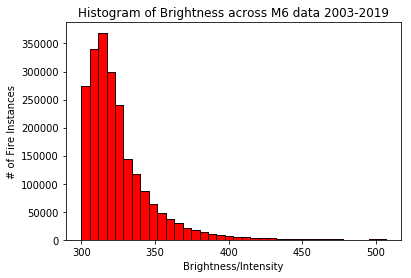

In [23]:
# matplotlib histogram
plt.hist(NASA_M6['brightness'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(NASA_M6['brightness'], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Brightness across M6 data 2003-2019')
plt.xlabel('Brightness/Intensity')
plt.ylabel('# of Fire Instances')

Text(0, 0.5, '# of Fire Instances')

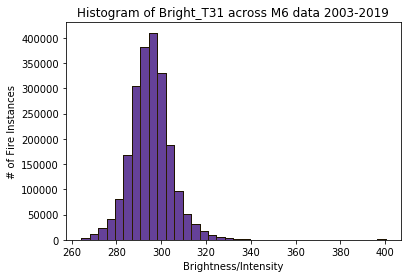

In [24]:
# matplotlib histogram
plt.hist(NASA_M6['bright_t31'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(NASA_M6['bright_t31'], hist=True, kde=False, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Bright_T31 across M6 data 2003-2019')
plt.xlabel('Brightness/Intensity')
plt.ylabel('# of Fire Instances')

Text(0, 0.5, 'Fire Instances')

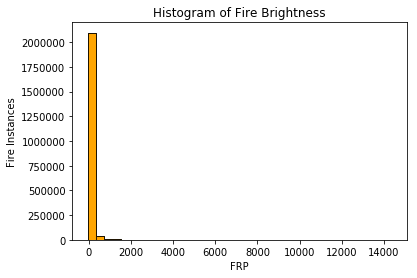

In [19]:
# matplotlib histogram
plt.hist(NASA_M6['frp'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(NASA_M6['frp'], hist=True, kde=False, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Fire Brightness')
plt.xlabel('FRP')
plt.ylabel('Fire Instances')

In [20]:
### & (NASA_M6.latitude > 40) & (NASA_M6.latitude < 50) & (NASA_M6.longitude < -119) & (NASA_M6.longitude > -126)]  
NM2005 = NASA_M6[(NASA_M6.year > '2004') & (NASA_M6.year < '2006') & (NASA_M6.latitude > 45.7) & (NASA_M6.latitude < 45.99) & (NASA_M6.longitude < -120.18) & (NASA_M6.longitude > -120.8)] 

In [21]:
NM2005.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
343878,45.8023,-120.2710,336.1,1.3,1.1,2005-07-23,2040,Aqua,MODIS,83,6.2,318.8,17.3,D,0,2005
344092,45.8270,-120.2290,314.7,1.1,1.1,2005-07-24,608,Terra,MODIS,90,6.2,292.8,15.2,N,0,2005
344093,45.8176,-120.2265,307.7,1.1,1.1,2005-07-24,608,Terra,MODIS,68,6.2,293.2,9.1,N,0,2005
344094,45.8082,-120.2242,318.2,1.1,1.1,2005-07-24,608,Terra,MODIS,96,6.2,293.9,18.6,N,0,2005
344194,45.8062,-120.2258,300.2,1.1,1.0,2005-07-24,1015,Aqua,MODIS,21,6.2,287.7,5.6,N,0,2005


#def graph_data(path, xkey='doy', ykey='eco'):
data = NASA_M6_2005
xval = data['acq_date']
yval = data['frp']
#Year = emyear2003['year']

fig,axe = plt.subplots()
plt.scatter(xval, yval, alpha=0.7)
plt.ylim([0, data['frp'].max()+100])

plt.ylabel('Emissions of CO')
plt.xlabel('Acq Date')
plt.title('FRP Brightness across time') 
#+ str(Year))

plt.grid(True)
plt.show()

#graph_data(emyear2003) # Or whatever your path is

NM2005[['longitude', 'frp']]

### Sending results of NASA M6 geo zoom map area to file. 
NM2005.to_csv('/Users/AlfHaugen/Python/Wildfire_Data/Predicting-Wildfires/NASA2005WoodGulch.csv', encoding='utf-8')

In [22]:
emdata = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/9 Missoula Emisions Data RDS-2017-0039/Emissions_Year/emissions_year2003to2015.csv')

In [ ]:
emyear2005 = emdata[(emdata.year == 2005) & (emdata.latitude > 45.6) & (emdata.latitude < 45.99) & (emdata.longitude < -119) & (emdata.longitude > -120.8) & (emdata.doy > 204) & (emdata.doy < 210)]

In [ ]:
cluster2005 = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/FireExports/ClusterDBScan_Emissions2005.csv')

In [ ]:
c25 = cluster2005[(cluster2005.latitude > 45.6) & (cluster2005.latitude < 45.99) & (cluster2005.longitude < -119.8) & (cluster2005.longitude > -120.8)] 

In [ ]:
c25.shape

#### Plotting article. 
https://medium.com/python-pandemonium/data-visualization-in-python-scatter-plots-in-matplotlib-da90ac4c99f9

In [ ]:
###Plotting area of Emissions Data vs NASA M6 Data together to view overlap. 
NM2005.plot(kind="scatter", x="longitude", y="latitude",alpha=0.8, color='b')
emyear2005.plot(kind="scatter", x="longitude", y="latitude",alpha=0.8, color='r')
plt.show

In [ ]:
### Plotting both Emissions and NASA M6 for same geo area to determine overlap. 
LongNM, LatNM = NM2005['longitude'], NM2005['latitude']
LongEM05, LatEM05 = emyear2005['longitude'], emyear2005['latitude']
LongEMClust, LatEMClust = c25['longitude'], c25['latitude']
    
plt.scatter(LongEM05, LatEM05, color='r', edgecolors='r')
plt.scatter(LongNM, LatNM, s=100, edgecolors='b')
plt.scatter(LongEMClust, LatEMClust, s=350, color='g', edgecolors='g')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('2005 Emissions Cluster Point (Green), Emission Points (Red) and NASA M6 Points (Blue) for July 2005 Wood Gulch Fire')
plt.show()

In [ ]:
# Extract the data we're interested in
       lat, lon = cities['latd'], cities['longd']
       population, area = cities['population_total'], cities['area_total_km2']

       # Scatter the points, using size and color but no label
       plt.scatter(lon, lat, label=None,
                   c=np.log10(population), cmap='viridis',
                   s=area, linewidth=0, alpha=0.5)
       plt.axis(aspect='equal')
       plt.xlabel('longitude')
       plt.ylabel('latitude')
       plt.colorbar(label='log$_{10}$(population)')
       plt.clim(3, 7)

       # Here we create a legend:
       # we'll plot empty lists with the desired size and label
       for area in [100, 300, 500]:
           plt.scatter([], [], c='k', alpha=0.3, s=area,
                       label=str(area) + ' km$^2$')
       plt.legend(scatterpoints=1, frameon=False,
                  labelspacing=1, title='City Area')

       plt.title('California Cities: Area and Population');

# NASA J1V1 Data Review

In [ ]:
NASA_J1V1['year'] = NASA_J1V1['acq_date'].astype(str).str[0:4]

In [ ]:
NASA_J1V1.head()

In [ ]:
NASA_J1V1['year'].unique()

In [ ]:
NASA_J1V1.shape

In [ ]:
# matplotlib histogram
plt.hist(NASA_M6['brightness'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(NASA_M6['brightness'], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Fire Brightness')
plt.xlabel('Brightness/Intensity')
plt.ylabel('Fire Instances')